# **Fares Ahmed Moustafa Ahmed**
## F.ahmed2270@nu.edu.eg

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/tmp/ipython-input-2235548422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


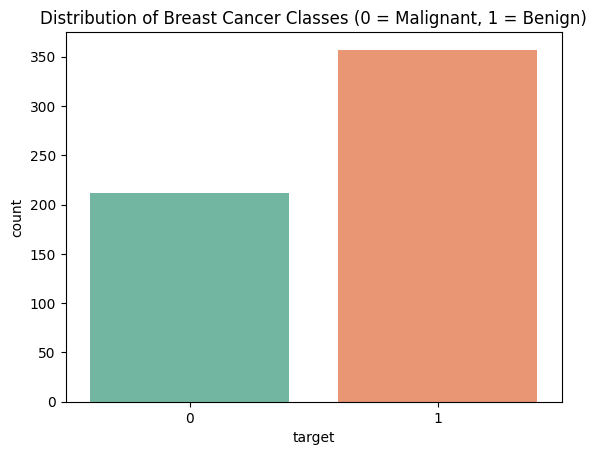

,count
target,
1,357
0,212


In [2]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Distribution of Breast Cancer Classes (0 = Malignant, 1 = Benign)")
plt.show()

df['target'].value_counts()

In [3]:
print("Shape of dataset:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum().head())
print("\nClass distribution:")
print(df['target'].value_counts(normalize=True) * 100)  # percentages

Shape of dataset: (569, 31)

Missing values per column:
 mean radius        0
mean texture       0
mean perimeter     0
mean area          0
mean smoothness    0
dtype: int64

Class distribution:
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🔹 Decision Tree Results 🔹
Accuracy: 0.9122807017543859

Classification Report:
                precision    recall  f1-score   support

Malignant (0)       0.85      0.93      0.89        42
   Benign (1)       0.96      0.90      0.93        72

     accuracy                           0.91       114
    macro avg       0.90      0.92      0.91       114
 weighted avg       0.92      0.91      0.91       114



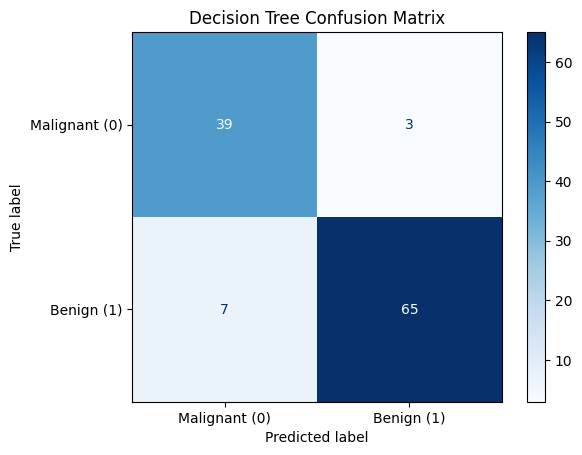

Decision Tree - Recall for Malignant (0): 0.9285714285714286


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("🔹 Decision Tree Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=['Malignant (0)', 'Benign (1)']))

# Confusion Matrix - Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=['Malignant (0)', 'Benign (1)']).plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Extract recall for Malignant (class 0)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
print("Decision Tree - Recall for Malignant (0):", report_dt['0']['recall'])



🔹 Random Forest Results 🔹
Accuracy: 0.956140350877193

Classification Report:
                precision    recall  f1-score   support

Malignant (0)       0.95      0.93      0.94        42
   Benign (1)       0.96      0.97      0.97        72

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114



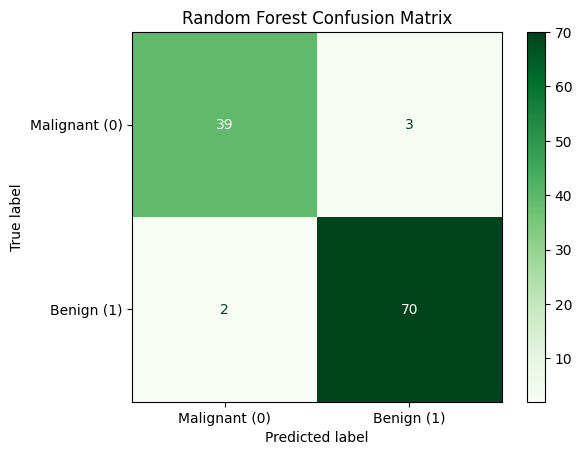

Random Forest - Recall for Malignant (0): 0.9285714285714286


In [14]:
from sklearn.ensemble import RandomForestClassifier
# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\n\n🔹 Random Forest Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Malignant (0)', 'Benign (1)']))

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=['Malignant (0)', 'Benign (1)']).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Extract recall for Malignant (class 0) - Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Random Forest - Recall for Malignant (0):", report_rf['0']['recall'])


In [16]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_dt.fit(X_train_scaled, y_train)

print("Best Decision Tree Parameters:", grid_dt.best_params_)
print("Best Cross-Validation Recall:", grid_dt.best_score_)

# Evaluate tuned Decision Tree on test set
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test_scaled)

report_best_dt = classification_report(y_test, y_pred_best_dt, output_dict=True)
print("Tuned Decision Tree - Recall for Malignant (0):", report_best_dt['0']['recall'])


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Recall: 0.9719298245614034
Tuned Decision Tree - Recall for Malignant (0): 0.9047619047619048


In [21]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Cross-Validation Recall:", grid_rf.best_score_)

# Evaluate tuned Random Forest on test set
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

report_best_rf = classification_report(y_test, y_pred_best_rf, output_dict=True)
print("Tuned Random Forest - Recall for Malignant (0):", report_best_rf['0']['recall'])

Best Random Forest Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Recall: 0.968421052631579
Tuned Random Forest - Recall for Malignant (0): 0.9285714285714286


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipelines = {
    "DecisionTree_NoScaling": Pipeline([
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),

    "DecisionTree_Scaling": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),

    "DecisionTree_PCA": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),

    "RandomForest_NoScaling": Pipeline([
        ('clf', RandomForestClassifier(random_state=42))
    ]),

    "RandomForest_Scaling": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(random_state=42))
    ]),

    "RandomForest_PCA": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('clf', RandomForestClassifier(random_state=42))
    ])
}

In [19]:
from sklearn.metrics import recall_score

results = {}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    recall_malignant = recall_score(y_test, y_pred, pos_label=0)
    results[name] = recall_malignant
    print(f"{name} - Recall (Malignant=0): {recall_malignant:.4f}")


DecisionTree_NoScaling - Recall (Malignant=0): 0.9286
DecisionTree_Scaling - Recall (Malignant=0): 0.9286
DecisionTree_PCA - Recall (Malignant=0): 0.8810
RandomForest_NoScaling - Recall (Malignant=0): 0.9286
RandomForest_Scaling - Recall (Malignant=0): 0.9286
RandomForest_PCA - Recall (Malignant=0): 0.9048


/tmp/ipython-input-1023888283.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Pipeline', y='Recall_Malignant', palette='viridis')


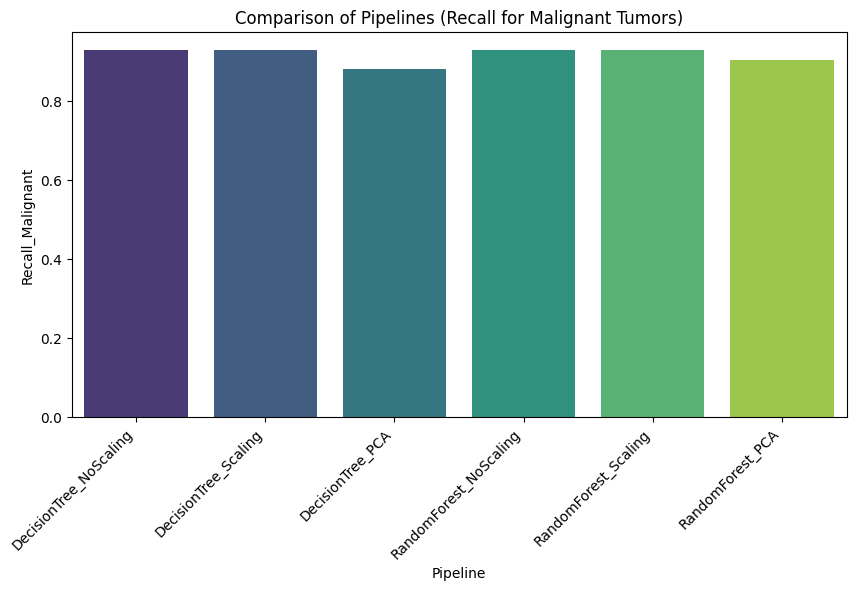

In [20]:
import seaborn as sns

results_df = pd.DataFrame(list(results.items()), columns=['Pipeline', 'Recall_Malignant'])
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Pipeline', y='Recall_Malignant', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Comparison of Pipelines (Recall for Malignant Tumors)")
plt.show()
